<a href="https://colab.research.google.com/github/Meenusj/Case_study/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mutation with cnn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/5
220/220 [==============================] - 20s 85ms/step - loss: 0.3709 - accuracy: 0.8051 - val_loss: 0.1564 - val_accuracy: 0.9451
Epoch 2/5
220/220 [==============================] - 17s 79ms/step - loss: 0.0986 - accuracy: 0.9643 - val_loss: 0.1415 - val_accuracy: 0.9484
Epoch 3/5
220/220 [==============================] - 20s 91ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.1454 - val_accuracy: 0.9477
Epoch 4/5
220/220 [==============================] - 19s 87ms/step - loss: 0.0246 - accuracy: 0.9914 - val_loss: 0.1663 - val_accuracy: 0.9454
Epoch 5/5
220/220 [==============================] - 19s 85ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.1838 - val_accuracy: 0.9474


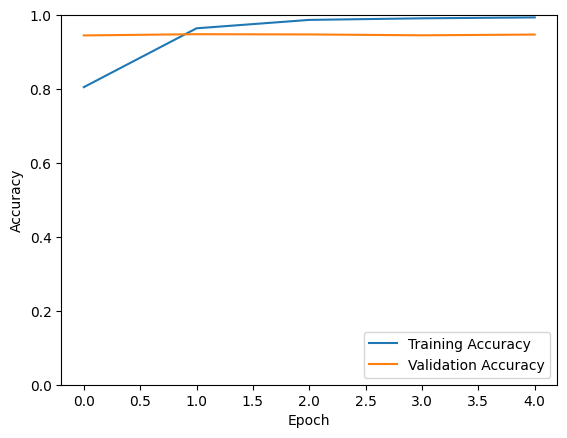

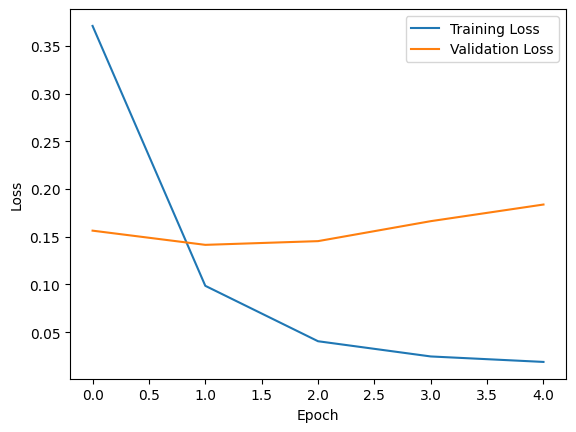

94/94 [==============================] - 1s 9ms/step - loss: 0.1418 - accuracy: 0.9468
Test accuracy: 0.9467554092407227
94/94 [==============================] - 1s 9ms/step
Confusion Matrix:
[[1431   75]
 [  85 1414]]
Precision: 0.94677437346477
Recall: 0.9467554076539102
F1 Score: 0.9467544052347143
Actual vs Predicted:
      Actual  Predicted
0          0          0
1          0          0
2          0          0
3          1          1
4          1          1
...      ...        ...
3000       0          0
3001       1          1
3002       0          0
3003       0          0
3004       1          1

[3005 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle
import random
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Step 1: Read and Prepare Data
df = pd.read_csv('/content/balanced_dataset.csv')
X = df['text'].values
y = df['labels'].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting data into train, validation, test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Define Mutation Functions

# Identify articles, adjectives, and adverbs
articles = {'a', 'an', 'the'}
adjectives_adverbs_tags = {'JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS'}

# Character-Level Substitution
def substitute_random_char(word):
    if len(word) == 0:
        return word
    pos = random.randint(0, len(word)-1)
    char = chr(random.randint(97, 122))
    return word[:pos] + char + word[pos+1:]

# Word-Level Substitution for articles, adjectives, adverbs
random_articles = list(articles)
random_adjectives_adverbs = ["very", "quickly", "eager", "bravely", "beautiful", "happy"]

def substitute_random_word(word, tag):
    if word.lower() in articles:
        return random.choice(random_articles)
    elif tag in adjectives_adverbs_tags:
        return random.choice(random_adjectives_adverbs)
    return word

# Apply Character and Word-Level Substitutions
def apply_mutations(data):
    mutated_data = []
    for text in data:
        words = word_tokenize(text)
        pos_tags = pos_tag(words)
        mutated_words = []
        for word, tag in pos_tags:
            if word.lower() in articles or tag in adjectives_adverbs_tags:
                # Apply word-level substitution
                word = substitute_random_word(word, tag)
                # Apply character-level substitution
                word = substitute_random_char(word)
            mutated_words.append(word)
        mutated_text = ' '.join(mutated_words)
        mutated_data.append(mutated_text)
    return mutated_data

# Step 3: Apply Mutations
X_train_mutated = apply_mutations(X_train)
X_val_mutated = apply_mutations(X_val)
X_test_mutated = apply_mutations(X_test)

# Step 4: Text Preprocessing (tokenization, sequence conversion)
# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train_mutated)

X_train_sequences = tokenizer.texts_to_sequences(X_train_mutated)
X_val_sequences = tokenizer.texts_to_sequences(X_val_mutated)
X_test_sequences = tokenizer.texts_to_sequences(X_test_mutated)

# Padding sequences
max_len = 100
X_train_sequences = pad_sequences(X_train_sequences, maxlen=max_len)
X_val_sequences = pad_sequences(X_val_sequences, maxlen=max_len)
X_test_sequences = pad_sequences(X_test_sequences, maxlen=max_len)

# Reshape sequences to add channel dimension for Conv1D
X_train_sequences = np.expand_dims(X_train_sequences, axis=-1)
X_val_sequences = np.expand_dims(X_val_sequences, axis=-1)
X_test_sequences = np.expand_dims(X_test_sequences, axis=-1)

# # Step 5: Define and compile your CNN model
# model_cnn = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(max_len, 1)),
#     tf.keras.layers.GlobalMaxPooling1D(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
# ])

# model_cnn.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history = model_cnn.fit(X_train_sequences, y_train,
                        epochs=5,
                        batch_size=64,
                        validation_data=(X_val_sequences, y_val),
                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])


# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# Step 7: Evaluation
loss, accuracy = model_cnn.evaluate(X_test_sequences, y_test)
print(f'Test accuracy: {accuracy}')

# Step 8: Predictions
y_pred_proba = model_cnn.predict(X_test_sequences)
y_pred = np.argmax(y_pred_proba, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Precision, Recall, F1 Score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Actual vs Predicted Outputs
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('Actual vs Predicted:')
print(results)

# Step 9: Save Model
model_cnn.save('text_classification_model.h5')

# Save results to a pickle file
with open('model_results.pkl', 'wb') as f:
    pickle.dump(results, f)


Fasttext with cnn

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246765 sha256=c61a845717cc708bec3922a3eda5028a27069df60899258d0f1637f52795765a
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle
import nltk
import fasttext.util

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load FastText embeddings
fasttext.util.download_model('en', if_exists='ignore')  # download English model
ft = fasttext.load_model('cc.en.300.bin')  # load FastText model

# Step 1: Read and Prepare Data
df = pd.read_csv('/content/balanced_dataset.csv')
X = df['text'].values
y = df['labels'].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting data into train, validation, test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Text Preprocessing (tokenization, sequence conversion)
# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences
max_len = 100
X_train_sequences = pad_sequences(X_train_sequences, maxlen=max_len)
X_val_sequences = pad_sequences(X_val_sequences, maxlen=max_len)
X_test_sequences = pad_sequences(X_test_sequences, maxlen=max_len)

# Step 3: Get FastText Embeddings
def get_embedding_matrix(word_index, embedding_dim=300):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = ft.get_word_vector(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

# Create embedding matrix
embedding_matrix = get_embedding_matrix(tokenizer.word_index)

# Step 4: Define and compile your CNN model with FastText Embeddings
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1,
                              output_dim=300,  # FastText embedding dimension
                              weights=[embedding_matrix],
                              input_length=max_len,
                              trainable=False),  # Set trainable=False to keep the embeddings fixed
    tf.keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Step 5: Training
history = model_cnn.fit(X_train_sequences, y_train,
                        epochs=5,
                        batch_size=64,
                        validation_data=(X_val_sequences, y_val),
                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

# Step 6: Evaluation
loss, accuracy = model_cnn.evaluate(X_test_sequences, y_test)
print(f'Test accuracy: {accuracy}')

# Confusion Matrix
y_pred = np.argmax(model_cnn.predict(X_test_sequences), axis=1)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)



# Print Actual vs Predicted Outputs
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Actual vs Predicted Outputs:")
print(actual_vs_predicted.head(30))  # Display the first 30 predictions

# Save the model
model_cnn.save('text_classification_model_with_fasttext.h5')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/5
220/220 [==============================] - 27s 120ms/step - loss: 0.4834 - accuracy: 0.7609 - val_loss: 0.2660 - val_accuracy: 0.8935
Epoch 2/5
220/220 [==============================] - 31s 141ms/step - loss: 0.2778 - accuracy: 0.8878 - val_loss: 0.2014 - val_accuracy: 0.9244
Epoch 3/5
220/220 [==============================] - 50s 228ms/step - loss: 0.2132 - accuracy: 0.9151 - val_loss: 0.1819 - val_accuracy: 0.9248
Epoch 4/5
220/220 [==============================] - 29s 134ms/step - loss: 0.1759 - accuracy: 0.9316 - val_loss: 0.1621 - val_accuracy: 0.9331
Epoch 5/5
94/94 [==============================] - 2s 20ms/step - loss: 0.1537 - accuracy: 0.9371
Test accuracy: 0.9371048212051392
94/94 [==============================] - 3s 29ms/step
Confusion Matrix:
[[1429   77]
 [ 112 1387]]
Actual vs Predicted Outputs:
    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        1          1
4        1          1
5        1          1
6        1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load BERT model and tokenizer
bert_model_name = 'bert-base-cased'
tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = TFBertModel.from_pretrained(bert_model_name)

# Step 1: Read and Prepare Data
df = pd.read_csv('/content/balanced_dataset.csv')
X = df['text'].values
y = df['labels'].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting data into train, validation, test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Tokenization and Padding
def bert_tokenize_and_pad(texts, max_len=512):  # Set max_len to 512
    tokenized_texts = [tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=max_len) for text in texts]
    padded_texts = pad_sequences(tokenized_texts, maxlen=max_len, truncating='post', padding='post')
    attention_masks = [[float(i > 0) for i in seq] for seq in padded_texts]
    return padded_texts, attention_masks

X_train_padded, X_train_attention_masks = bert_tokenize_and_pad(X_train)
X_val_padded, X_val_attention_masks = bert_tokenize_and_pad(X_val)
X_test_padded, X_test_attention_masks = bert_tokenize_and_pad(X_test)

# Step 3: Get BERT Embeddings
def get_bert_embeddings(model, padded_texts, attention_masks):
    inputs = {'input_ids': np.array(padded_texts), 'attention_mask': np.array(attention_masks)}
    outputs = model(inputs)
    return outputs.last_hidden_state

X_train_embeddings = get_bert_embeddings(bert_model, X_train_padded, X_train_attention_masks)
X_val_embeddings = get_bert_embeddings(bert_model, X_val_padded, X_val_attention_masks)
X_test_embeddings = get_bert_embeddings(bert_model, X_test_padded, X_test_attention_masks)

# Step 4: Define and compile your CNN model with BERT Embeddings
input_shape = X_train_embeddings.shape[1:]

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Conv1D(filters=64, kernel_size=7, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Step 5: Training
history = model_cnn.fit(X_train_embeddings, y_train,
                        epochs=5,
                        batch_size=64,
                        validation_data=(X_val_embeddings, y_val),
                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

# Step 6: Evaluation
loss, accuracy = model_cnn.evaluate(X_test_embeddings, y_test)
print(f'Test accuracy: {accuracy}')

# Confusion Matrix
y_pred = np.argmax(model_cnn.predict(X_test_embeddings), axis=1)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print('Classification Report:')
print(report)

# Print Actual vs Predicted Outputs
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Actual vs Predicted Outputs:")
print(actual_vs_predicted.head(30))  # Display the first 30 predictions

# Save the model
model_cnn.save('text_classification_model_with_bert_cnn.h5')


In [ ]:
# Classification Report (Precision, Recall, F1-score)
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
